In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/home/jovyan/Prostate_analysis/scanpy'))
sc.settings.verbosity = 3
sc.logging.print_versions()

results_file = 'out/prostate.h5ad'

adata = sc.read_h5ad(results_file)
adata = adata[~adata.obs['celltype'].isin(['Sperm'])]

/home/jovyan/my-conda-envs/mypython3/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


scanpy==1.4.5.post2 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.2 scipy==1.4.1 pandas==0.25.1 scikit-learn==0.22.1 statsmodels==0.11.0rc1 python-igraph==0.7.1 louvain==0.6.1


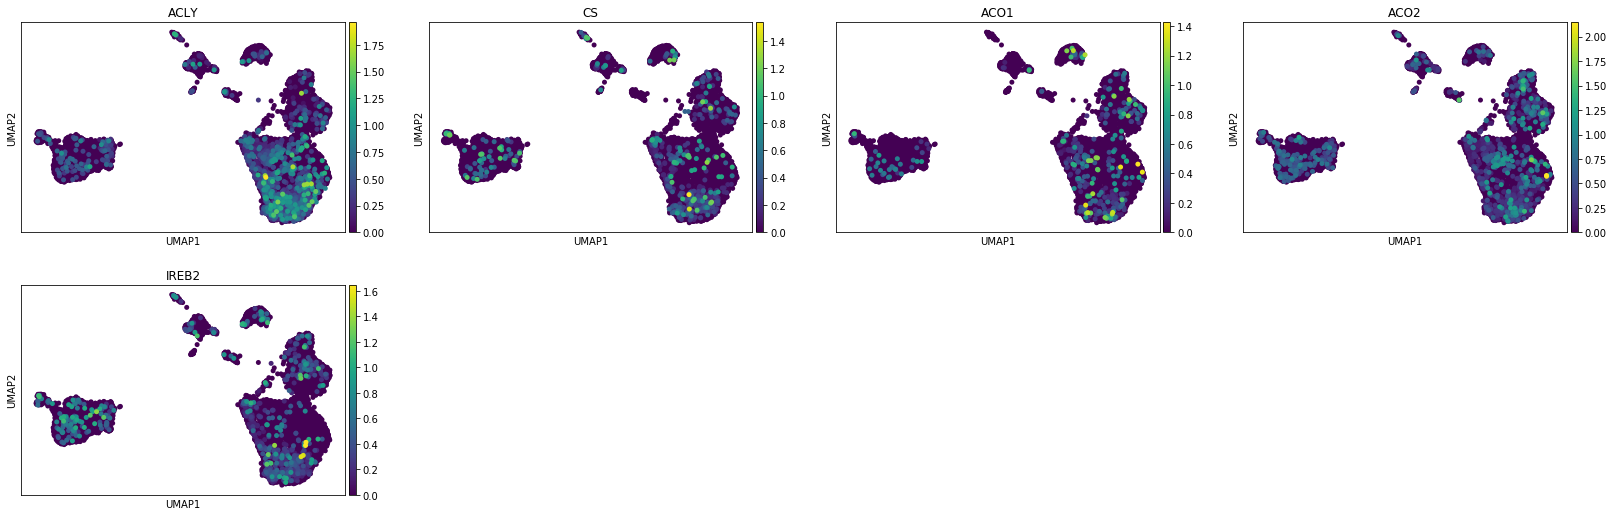

In [4]:
sc.pl.umap(adata, color = ['ACLY', 'CS', 'ACO1','ACO2','IREB2'], size = 100)

Trying to set attribute `.obs` of view, making a copy.


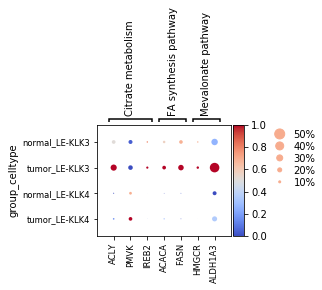

GridSpec(2, 5, height_ratios=[0.5, 10], width_ratios=[2.4499999999999997, 0, 0.2, 0.5, 0.25])

In [79]:
LEs = adata[adata.obs['celltype'].isin(['LE-KLK3', 'LE-KLK4'])]
LEs.obs['group_celltype'] = [g+'_'+c for g,c in zip(LEs.obs['group'], LEs.obs['celltype'])]
LEs.obs['group_celltype'] = LEs.obs['group_celltype'].astype('category')
LEs.obs['group_celltype'].cat.reorder_categories(['normal_LE-KLK3','tumor_LE-KLK3','normal_LE-KLK4','tumor_LE-KLK4'], inplace=True)
sc.pl.dotplot(LEs, {'Citrate metabolism':['ACLY', 'PMVK', 'IREB2'], 'FA synthesis pathway':['ACACA', 'FASN'], 'Mevalonate pathway':['HMGCR', 'ALDH1A3']}, standard_scale = 'var', groupby = 'group_celltype', color_map = 'coolwarm')

In [23]:
pathways = {'fatty acid biosynthetic process':['ABCD1', 'ABCD2', 'ABCD3', 'ACACA', 'ACACB', 'ACADL', 'ACADVL', 'ACLY', 'ACOT4', 'ACOT7', 'ACOT7L', 'ACSF3', 'ACSL3', 'ACSM1', 'ACSM2A', 'ACSM2B', 'ACSM3', 'ACSM4', 'ACSM5', 'ACSM6', 'ACSS1', 'ACSS2', 'ADIPOQ', 'ADIPOR1', 'ADIPOR2', 'AKR1C3', 'ALOX12', 'ALOX12B', 'ALOX15', 'ALOX15B', 'ALOX5', 'ALOX5AP', 'ALOXE3', 'ANXA1', 'APOA1', 'APOA4', 'APOA5', 'APOC1', 'APOC2', 'APOC3', 'ASAH2', 'ASAH2B', 'AVP', 'AVPR1A', 'BRCA1', 'CBR1', 'CBR4', 'CD74', 'CEACAM1', 'CYP1A1', 'CYP1A2', 'CYP2C8', 'CYP2C9', 'CYP2D6', 'CYP2E1', 'CYP3A4', 'CYP4A11', 'CYP4F11', 'CYP7A1', 'DECR2', 'DEGS1', 'EDN1', 'EDN2', 'EIF6', 'ELOVL1', 'ELOVL2', 'ELOVL3', 'ELOVL4', 'ELOVL5', 'ELOVL6', 'ELOVL7', 'EPHX2', 'ERLIN1', 'ERLIN2', 'FA2H', 'FABP5', 'FADS1', 'FADS2', 'FADS2P1', 'FADS3', 'FADS6', 'FASN', 'GIP', 'GPX4', 'GSTM4', 'HACD1', 'HACD2', 'HACD3', 'HACD4', 'HPGD', 'HPGDS', 'HSD17B12', 'HSD17B8', 'IL1B', 'INSIG1', 'INSIG2', 'LIAS', 'LIPC', 'LPGAT1', 'LPL', 'LTA4H', 'LTC4S', 'MCAT', 'MECR', 'MGLL', 'MGST1', 'MID1IP1', 'MIF', 'MLXIPL', 'MLYCD', 'MYO5A', 'NDUFAB1', 'NR1H2', 'NR1H3', 'OLAH', 'OXSM', 'PDK4', 'PECR', 'PIBF1', 'PLA2G1B', 'PLA2G4F', 'PLP1', 'PNPLA8', 'PRKAA1', 'PRKAA2', 'PRKAB1', 'PRKAB2', 'PRKAG1', 'PRKAG2', 'PRKAG3', 'PRXL2B', 'PTGDS', 'PTGES', 'PTGES2', 'PTGES3', 'PTGIS', 'PTGS1', 'PTGS2', 'QKI', 'RGN', 'SCAP', 'SCD', 'SCD5', 'SIRT1', 'SLC45A3', 'TBXAS1', 'TECR', 'TECRL', 'THNSL2', 'TRIB3', 'WDTC1', 'XBP1'],
 'cholesterol biosynthetic process':['FGF1', 'CYP7A1', 'ACAA2', 'RAN', 'GGPS1', 'KPNB1', 'SOD1', 'ERLIN1', 'NPC1L1', 'CNBP', 'LBR', 'MBTPS1', 'SC5D', 'CYB5R3', 'MBTPS2', 'ARV1', 'NFYB', 'SREBF2', 'SCAP', 'IDI2', 'ELOVL6', 'NFYC', 'TM7SF2', 'ACLY', 'NSDHL', 'EBP', 'PMVK', 'SP1', 'GPAM', 'POR', 'MVD', 'IDI1', 'NFYA', 'SEC14L2', 'DHCR24', 'MSMO1', 'APOA5', 'LSS', 'ERLIN2', 'SREBF1', 'PLPP6', 'SCD', 'ACACB', 'INSIG2', 'MVK', 'ABCA2', 'HMGCS2', 'INSIG1', 'ACAT2', 'APOB', 'PRKAA1', 'ACACA', 'APOE', 'FDPS', 'HMGCR', 'ABCG1', 'HSD17B7', 'G6PD', 'APOA4', 'CES1', 'DHCR7', 'FDFT1', 'SQLE', 'CYP51A1', 'PRKAA2', 'FASN', 'APOA1', 'HMGCS1', 'CFTR']}

In [ ]:
'Squalene -> Lanosterol':'LSS', 'Zymosterol -> Demosterol':'EBP', 'Demosterol -> Cholesterol':'DHCR24'

In [34]:
for p in pathways:
    sc.tl.score_genes(LEs, pathways[p], use_raw = True, score_name= p+'_score')

computing score 'fatty acid biosynthetic process_score'
    finished: added
    'fatty acid biosynthetic process_score', score of gene set (adata.obs) (0:00:00)
computing score 'cholesterol biosynthetic process_score'
    finished: added
    'cholesterol biosynthetic process_score', score of gene set (adata.obs) (0:00:00)


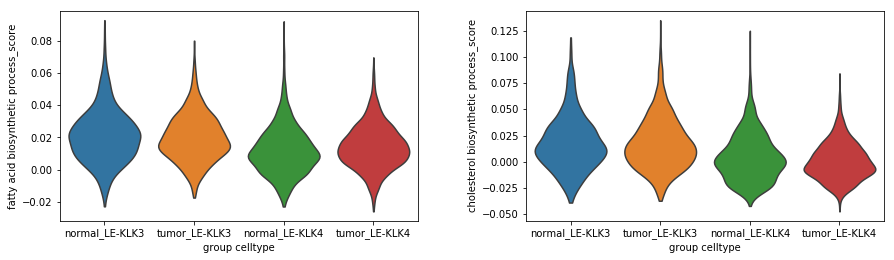

In [39]:
sc.pl.violin(LEs, ['fatty acid biosynthetic process_score', 'cholesterol biosynthetic process_score'], standard_scale = 'var', groupby = 'group_celltype', size = 0)

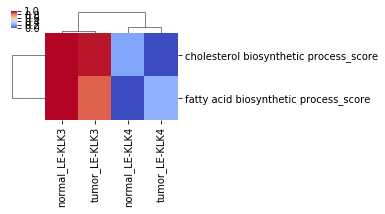

In [62]:
# calculate average enrichment score
list1 = list(set(LEs.obs['group_celltype']))
subset = LEs.obs[['group_celltype'] + [str(p)+'_score' for p in pathways]]
output = pd.DataFrame()
for x in list1:
    subsetX = subset[subset.group_celltype == x]
    outdict = {}
    for k in [str(p)+'_score' for p in pathways]:
        out = {k:np.mean(subsetX[k])}
        outdict.update(out)
    output = output.append(outdict, ignore_index=True)
output.index = list1
g = sns.clustermap(output.transpose(), standard_scale = 0, cmap="coolwarm", figsize=(3, 2))    

In [51]:
output

,cholesterol biosynthetic process_score,fatty acid biosynthetic process_score
0,0.004632,0.011986


In [45]:
subset

,group_celltype,fatty acid biosynthetic process_score,cholesterol biosynthetic process_score
index,,,


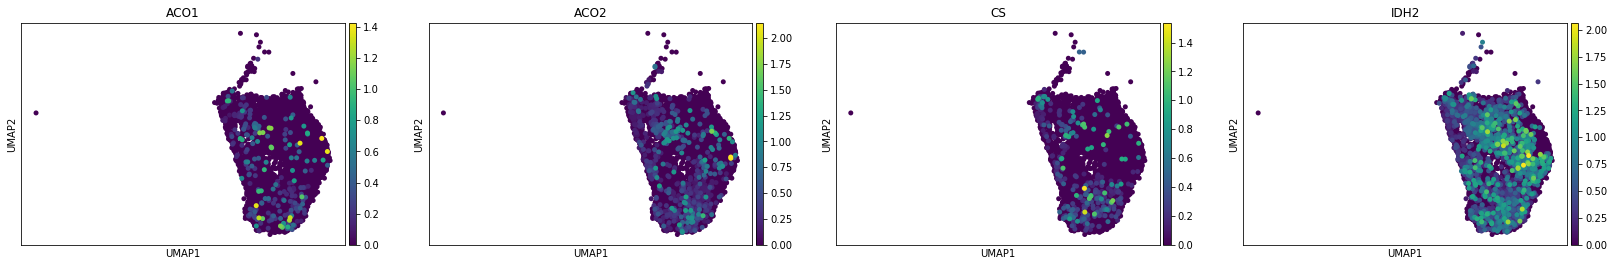

In [89]:
sc.pl.umap(LEs, color = ['ACO1', 'ACO2', 'CS', 'IDH2'], size = 100)


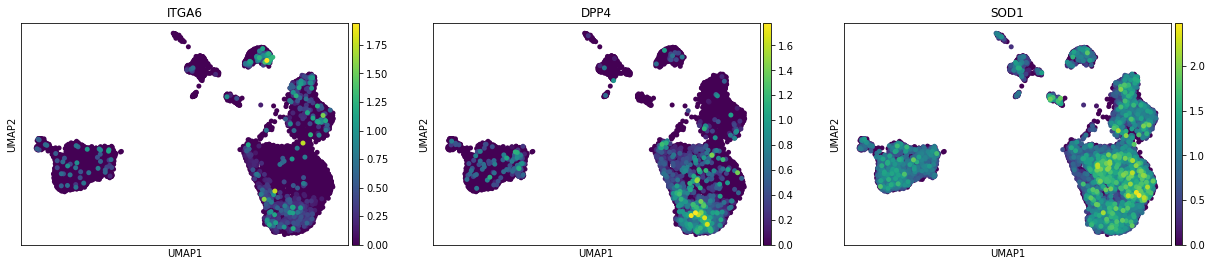

In [91]:
sc.pl.umap(adata, color = ['ITGA6', 'DPP4', 'SOD1'], size = 100)

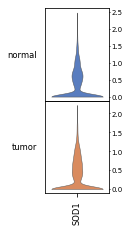

In [93]:
sc.pl.stacked_violin(adata, ['SOD1'], group)